In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

# List files in the root directory of Google Drive
drive_path = "/content/drive/My Drive/"
files = os.listdir(drive_path)
print(files)


['PCOS.zip', 'Colab Notebooks']


In [4]:
import shutil
import zipfile

# Path to the ZIP file in your Google Drive
zip_file_path = "/content/drive/My Drive/PCOS.zip"

# Path to the directory where you want to extract the contents
extract_path = "/content/"

# Copy the ZIP file from Google Drive to Colab
shutil.copy(zip_file_path, "/content/")

# Unzip the file while preserving directory structure
with zipfile.ZipFile("/content/PCOS.zip", "r") as zip_ref:
    zip_ref.extractall(extract_path)

# List the contents of the extracted directory
extracted_files = os.listdir(extract_path)
print("Files extracted successfully:")
for file in extracted_files:
    print(os.path.join(extract_path, file))


Files extracted successfully:
/content/.config
/content/drive
/content/PCOS
/content/PCOS.zip
/content/sample_data


In [5]:
!pip install tensorflow opencv-python matplotlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [6]:
import tensorflow as tf
import os

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
pwd


'/content'

In [10]:
data_dir = 'PCOS/PCOS_Training'

In [11]:
image_exts = ['jpeg','jpg','png']

In [12]:
os.listdir(data_dir)

['healthy_images', 'unhealthy_images']

In [13]:
os.listdir(os.path.join(data_dir , 'healthy_images'))

['image3678.jpg',
 'image2962.jpg',
 'image0865.jpg',
 'image3646.jpg',
 '91image78.jpg',
 'image2597.jpg',
 '16image34.jpg',
 'image2706.jpg',
 'image1940.jpg',
 'image2989.jpg',
 'image3272.jpg',
 'image0457.jpg',
 'image3522.jpg',
 'image3467.jpg',
 'image3455.jpg',
 'image3163.jpg',
 '22image0032.jpg',
 'image2437.jpg',
 'image2809.jpg',
 'image3616.jpg',
 'image2785.jpg',
 'image2462.jpg',
 '10image41.jpg',
 'image1967.jpg',
 'image3531.jpg',
 '15image12.jpg',
 'image3294.jpg',
 'pco_14.jpg',
 'image2754.jpg',
 'image0455.jpg',
 'image3099.jpg',
 'image3263.jpg',
 'image3088.jpg',
 'image1676.jpg',
 'image3052.jpg',
 'image3087.jpg',
 'image3614.jpg',
 'image3327.jpg',
 'image2572.jpg',
 'image3478.jpg',
 'image1470.jpg',
 '163image42.jpg',
 'image3316.jpg',
 '93image50.jpg',
 'image2940.jpg',
 'image2854.jpg',
 'image2999.jpg',
 '100image13.jpg',
 'image0431.jpg',
 'image2988.jpg',
 'image2735.jpg',
 'image3329.jpg',
 'image2753.jpg',
 'image2374.jpg',
 'normal_24.jpg',
 'image19

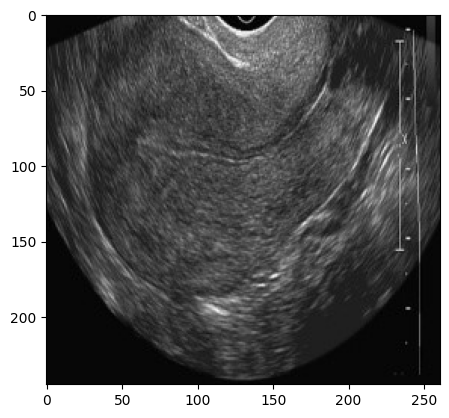

In [14]:
img = cv2.imread(os.path.join(data_dir , 'healthy_images' , 'image3726.jpg'))
img.shape
plt.imshow(img)


In [15]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 2491 files belonging to 2 classes.


In [18]:
# Print class names
print("Class Names:", data.class_names)

# Alternatively, you can print the labels assigned to each class
for i, class_name in enumerate(data.class_names):
    print(f"Label for class {class_name}: {i}")

Class Names: ['healthy_images', 'unhealthy_images']
Label for class healthy_images: 0
Label for class unhealthy_images: 1


In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch = data_iterator.next()

In [21]:
scaled = batch[0]/255


In [22]:
scaled.max()

1.0

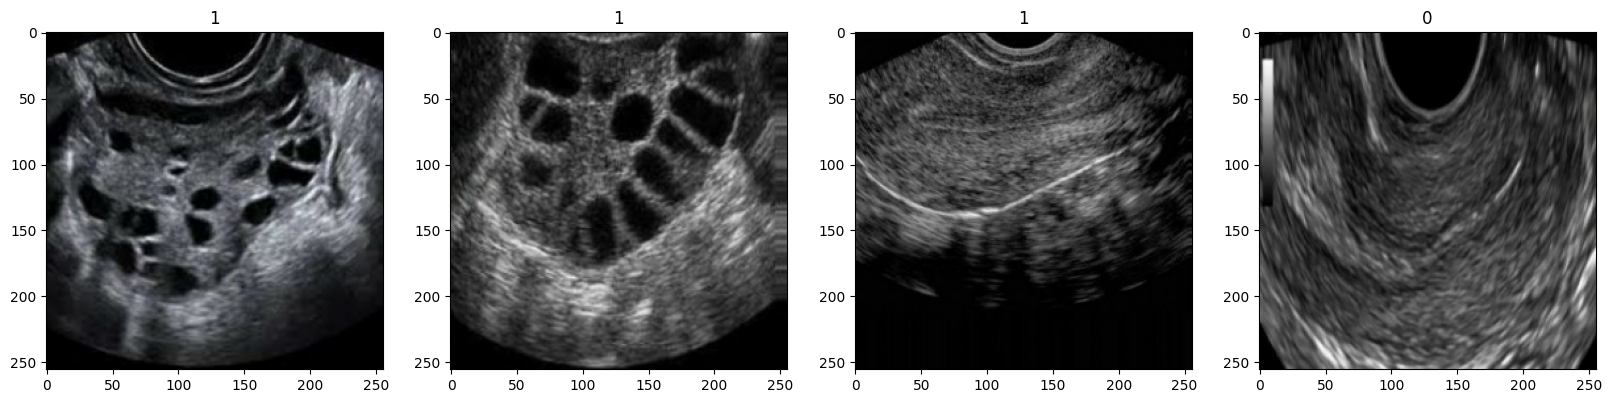

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [24]:
data = data.map(lambda x , y: (x/255 , y))

In [25]:
data.as_numpy_iterator().next()[0].max()

1.0

In [26]:
scaled_iterator = data.as_numpy_iterator()

In [27]:
batch = scaled_iterator.next()

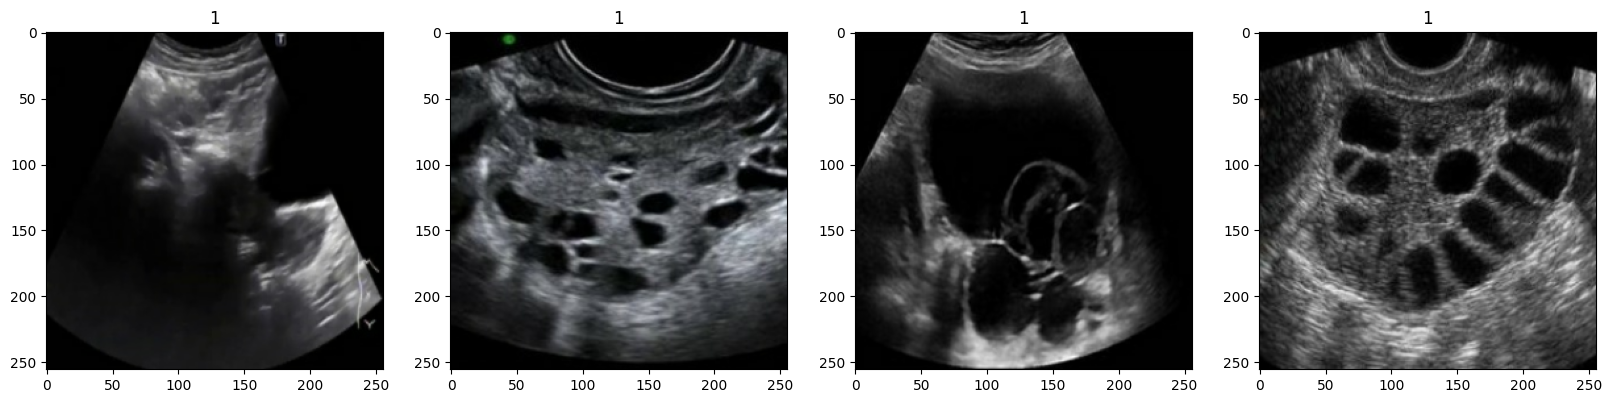

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [29]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [31]:
base_model = InceptionV3(weights='imagenet', include_top=False)

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 22852385 (87.17 MB)
Trainable params: 22817953 (87.04 MB)
Non-trainable params: 34432 (134.50 KB)
___________

In [32]:

model = Sequential()

In [33]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
# Load the InceptionV3 model with the correct input shape
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train,
    steps_per_epoch=len(train),
    epochs=10,
    validation_data=val,
    validation_steps=len(val)
)

Epoch 1/10
54/54 [==============================] - 69s 417ms/step - loss: 0.5983 - accuracy: 0.6690 - val_loss: 1035.6204 - val_accuracy: 0.5979
Epoch 2/10
54/54 [==============================] - 20s 374ms/step - loss: 0.5983 - accuracy: 0.6562 - val_loss: 9.9111 - val_accuracy: 0.5063
Epoch 3/10
54/54 [==============================] - 21s 391ms/step - loss: 0.6415 - accuracy: 0.6551 - val_loss: 364126.4688 - val_accuracy: 0.5625
Epoch 4/10
54/54 [==============================] - 21s 383ms/step - loss: 0.6507 - accuracy: 0.6481 - val_loss: 1222.2153 - val_accuracy: 0.5813
Epoch 5/10
54/54 [==============================] - 21s 383ms/step - loss: 0.5847 - accuracy: 0.6632 - val_loss: 6.7350 - val_accuracy: 0.3979
Epoch 6/10
54/54 [==============================] - 21s 381ms/step - loss: 0.5801 - accuracy: 0.6568 - val_loss: 0.6832 - val_accuracy: 0.6313
Epoch 7/10
54/54 [==============================] - 21s 385ms/step - loss: 0.5603 - accuracy: 0.6834 - val_loss: 5.5656 - val_accur

In [36]:
history.history

{'loss': [0.5982851386070251,
  0.5983070135116577,
  0.6415451765060425,
  0.6506631374359131,
  0.5847350358963013,
  0.5800616145133972,
  0.5602852702140808,
  0.5495889186859131,
  0.548303484916687,
  0.5406621098518372],
 'accuracy': [0.6689814925193787,
  0.65625,
  0.6550925970077515,
  0.6481481194496155,
  0.6631944179534912,
  0.6568287014961243,
  0.6834490895271301,
  0.7060185074806213,
  0.7048611044883728,
  0.7025462985038757],
 'val_loss': [1035.620361328125,
  9.911090850830078,
  364126.46875,
  1222.21533203125,
  6.734960079193115,
  0.6831863522529602,
  5.565620422363281,
  0.5241715908050537,
  0.9031512141227722,
  0.5898067355155945],
 'val_accuracy': [0.5979166626930237,
  0.5062500238418579,
  0.5625,
  0.581250011920929,
  0.39791667461395264,
  0.6312500238418579,
  0.5958333611488342,
  0.7270833253860474,
  0.6166666746139526,
  0.6479166746139526]}